**UP2290783 - Portfolio Part II**

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px #interactive charts
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Exercise 1: Generate Random DataFrame**

In [40]:
#Set random seed for reproducibility

np.random.seed(42)

#Generate random numbers in a DataFrame
df = pd.DataFrame(
    np.random.randn(6, 4), 
    columns=['A', 'B', 'C', 'D'], 
    index=[f'Row{i}' for i in range(1,7)]
    )

#Display DataFrame
print("\nGenerated DataFrame:")
df


Generated DataFrame:


,A,B,C,D
Row1,0.496714,-0.138264,0.647689,1.523030
Row2,-0.234153,-0.234137,1.579213,0.767435
Row3,-0.469474,0.542560,-0.463418,-0.465730
Row4,0.241962,-1.913280,-1.724918,-0.562288
Row5,-1.012831,0.314247,-0.908024,-1.412304
Row6,1.465649,-0.225776,0.067528,-1.424748


In [41]:
#Display Summary, Shape and Statistics
print("\nSummary:")
print(df.info())
print("\nShape:")
print(df.shape)
print("\nStatistics:")
print(df.describe())


Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Row1 to Row6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes
None

Shape:
(6, 4)

Statistics:
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.081311 -0.275775 -0.133655 -0.262434
std    0.861950  0.862828  1.168366  1.187681
min   -1.012831 -1.913280 -1.724918 -1.424748
25%   -0.410644 -0.232047 -0.796872 -1.199800
50%    0.003904 -0.182020 -0.197945 -0.514009
75%    0.433026  0.201119  0.502648  0.459144
max    1.465649  0.542560  1.579213  1.523030


**Exercise 2: Boxplots of Iris Dataset**

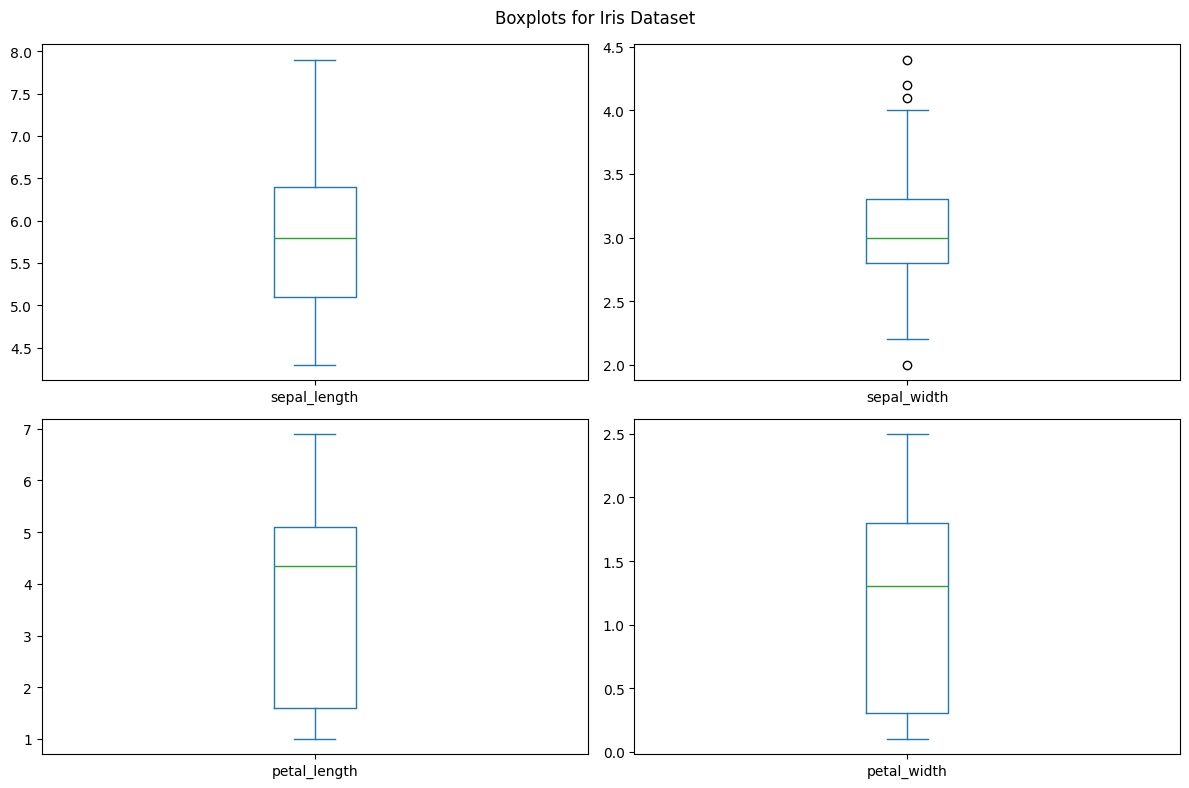

In [42]:
#Load Iris dataset
iris = sns.load_dataset('iris')

#Create boxplots for each numerical column
iris.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(2,2), title='Boxplots for Iris Dataset', figsize=(12,8))
plt.tight_layout()
plt.show()

**Exercise 3: Sunburst Chart using Tips Dataset**

In [43]:
#To ignore FutureWarning
import warnings
warnings.filterwarnings("ignore") 

#Load Tips dataset
tips = sns.load_dataset('tips')

#Create sunburst chart
fig = px.sunburst(
    tips,
    path=['sex', 'day', 'time'],
    values='tip',
    title='Tips by Sex, Day & Time'
)
fig.show()

**Exercise 4: Simple Linear Regression**

In [44]:
X = tips[['total_bill']]
y = tips['tip']

#Create and fit model
model = LinearRegression()
model.fit(X, y)

#Predict tip for a £30 total bill

total_bill = pd.DataFrame({'total_bill': [30]})
predicted_tip = model.predict(total_bill)
print(f"Predicted tip for a £30 restaurant bill: ${predicted_tip[0]:.2f}")

Predicted tip for a £30 restaurant bill: $4.07


**Exercise 5: Titanic Decision tree with One-Hot Encoding**

Model Accuracy: 0.7541899441340782

Prediction for single passenger: 1


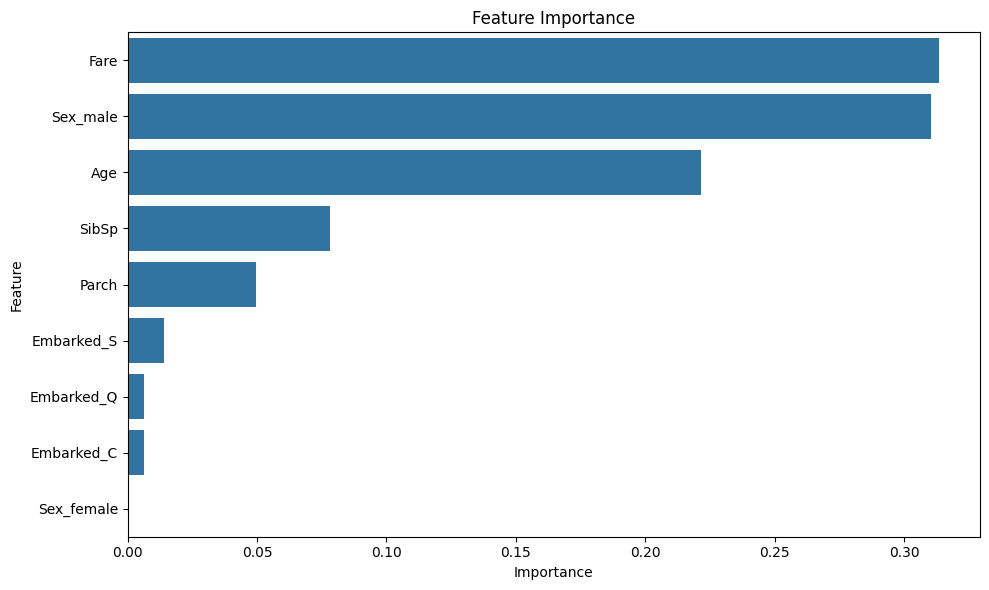

In [45]:
#Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Koldim2001/test_api/refs/heads/main/titanic.csv')

#Select features and target
features = ['Age', 'Fare', 'SibSp', 'Sex', 'Parch', 'Embarked']
target = 'Survived'

X = df[features]
y = df[target]

#Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

#Define categorical features
categorical_features = ['Sex', 'Embarked']

#Create a ColumnTransformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
    ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

#Create a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

#Train the model
pipeline.fit(X_train, y_train)

#Evaluate model accuracy
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy:", accuracy)

#Predict for a single person
single_passenger = pd.DataFrame({
    'Sex' : ['female'], 
    'Age': [30], 
    'Fare': [100], 
    'SibSp': [1], 
    'Parch': [0], 
    'Embarked': ['S']
    })

prediction = pipeline.predict(single_passenger)
print(f"\nPrediction for single passenger: {prediction[0]}")

#Feature Importance plot

#Extract feature names after encoding
encoded_features = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
all_features = list(encoded_features) + ['Age', 'Fare', 'SibSp','Parch']

#Extract feature importances
importances = pipeline.named_steps['classifier'].feature_importances_

#Create DataFrame for feature importances
f_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
f_importance_df.sort_values('Importance', ascending=False, inplace=True)

#Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=f_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

The End :)